## BD5read_count  - reading in an existing BD5 file and analyse the data.

BD5read_count is a sample code to demonstrate how to read in an existing BD5 file and do some simple analysis by counting the number of nucleus vs time point and ploting out a prolification curve of *C.elegans*.

We choose an existing BD5 file from the SSBD:database.

Ref: Bao et al. (2006) Proc Natl Acad Sci USA 103, 2707-2712.

SSBD:database ref: http://ssbd.qbic.riken.jp/search3/800faa21-c28c-4b72-bd12-d41f2eed02e8/

In [1]:
# Author: Koji Kyoda
# sample code for reading an existing BD5 file perform some analysis. 

import h5py

In [2]:
file = "081505_L1_bd5.h5"
f = h5py.File(file, "r")

groups= f['data']

elapsed_time:0.05273914337158203[sec]


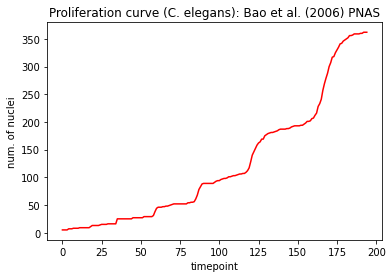

In [3]:
import time
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)



if __name__ == '__main__':
    start = time.time()

    no_of_nucleus = []
    timept = []
    count = 0
    while (str(count) in groups.keys()):
        name = "/data/" + str(count) + "/object/0"
        dset = f[name]
        timept.append(count)
        no_of_nucleus.append(dset.len())
        count = count + 1

    fig=plt.figure()
    plt.plot(timept, no_of_nucleus, 'r')
    ax = fig.add_subplot(1,1,1)
    ax.set_ylabel('num. of nuclei')
    ax.set_xlabel('timepoint')
    plottitle = 'Proliferation curve (C. elegans): Bao et al. (2006) PNAS'
    plt.title(plottitle);
        
        
    elapsed_time = time.time() - start
    print ("elapsed_time:{0}".format(elapsed_time) + "[sec]")